## Non-Snoring Audio Data Analysis
### Introduction

The main objective of this notebook is to perform a comprehensive analysis of non-snoring audio files. We will focus on the following key steps:

1. **Data Loading**: Load non-snoring audio files to be used in our analysis. These audio files might include a variety of non-snoring sounds from different sources.

2. **Data Preprocessing**: Before analysis, we need to preprocess the audio data. This includes tasks such as resampling audio files, extracting relevant features, and structuring the data in a suitable format for further analysis.

3. **Visualization**: Utilize visualization techniques to gain insights into the non-snoring audio data. Visualizations can provide a better understanding of the characteristics and patterns present in the audio files.

4. **Feature Extraction**: Extract meaningful features from the audio data. These features will be used as inputs for machine learning models and can capture essential information about the sound patterns.

By the end of this analysis, we aim to have a well-processed dataset with extracted features and insightful visualizations that will serve as a foundation for further exploration and potential model development.

## Libraries Used
Let's start by importing the required libraries for our analysis. Each library has a specific purpose and will be utilized for various tasks.

In [1]:
# Import necessary libraries
import sys
from pathlib import Path


import pandas as pd
import warnings

# Filter out warnings to maintain a clean output
warnings.filterwarnings('ignore')
sys.path.append('/home/ayikanying/Sleepiz/sleepiz_sleep_analysis')

# Loading Non-Snoring Audio Data

## Data Source
The audio data used in this analysis consists of non-snoring sounds collected from various sources. These sources could include recordings of different environmental sounds, human activities, and objects that produce distinctive non-snoring sounds.

## Data Loading Process
To begin our analysis, we'll load the non-snoring audio data into the notebook. This involves reading audio files and preparing them for further processing.

### Steps:
1. **File Paths**: Prepare a list of file paths pointing to the non-snoring audio files.

3. **Loading into DataFrame**: Store the audio data along with relevant metadata, such as file paths or labels, into a Pandas DataFrame.

By loading the data into a DataFrame, we can easily organize and manipulate it for further analysis, visualization, and feature extraction.

In [2]:
# Defining filepath for non_snoring files
non_snoring_path = Path("../data/0/")

from src.IO.dataLoader import AudioLoader
loader = AudioLoader()
data = loader.load_files_to_dataframe(non_snoring_path)

## Audio Preprocessing

Audio preprocessing involves a series of essential activities that transform raw audio data into a suitable format for analysis, feature extraction, and modeling. Here are some common activities performed during audio preprocessing:

### Resampling
Adjust the sample rate of audio files to ensure uniformity and compatibility across the dataset.

### Normalization
Scale the audio waveform to have values between -1 and 1, making it suitable for machine learning algorithms.

### Trimming and Padding
Ensure all audio clips have a consistent length by trimming longer clips or padding shorter ones with silence.

### Background Noise Removal
Reduce or remove background noise to enhance the quality of the audio signal.

### Data Augmentation
Introduce variations like pitch shifting, time stretching, and noise addition to increase dataset diversity.

### Feature Extraction
Compute audio features such as MFCCs, chroma features, and spectral contrast to capture essential characteristics.

### Segmentation
Divide long audio recordings into shorter segments for better manageability.

### Filtering
Apply filters to emphasize or attenuate specific frequency components.

### Rescaling
Adjust the amplitude of the audio waveform if it's too quiet or too loud.

### Channel Mixing
Combine multiple audio channels (e.g., stereo) into a single channel if needed.

### Encoding
Convert audio data into formats like spectrograms suitable for machine learning models.

### Data Normalization
Normalize audio features to a consistent scale to improve algorithm performance.

### Error Handling
Handle anomalies, errors, or corrupted audio files effectively within the preprocessing pipeline.

### Metadata Handling
Associate metadata such as labels, categories, or timestamps with audio data.

### Saving Preprocessed Data
Store preprocessed audio data in organized formats like NumPy arrays or HDF5 files.

### Data Visualization
Visualize preprocessed audio to inspect effects of preprocessing steps and ensure data quality.

These preprocessing activities collectively transform raw audio waveforms into structured, informative, and analysis-ready data, facilitating subsequent tasks in audio analysis and machine learning.

In [3]:
from src.AudioPreprocessing.audio_preprocessor import AudioPreprocessor

preprocessor = AudioPreprocessor(data)
df = preprocessor.preprocess("Audio", "sample_rate")
df.to_csv("../data/csv/non_snoring.csv", index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Audio        500 non-null    object
 1   label        500 non-null    object
 2   sample_rate  500 non-null    int64 
 3   features     500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


## Data Visualizations

#### Audio Signal Visualization

##### Waveform
Description: This plot shows the amplitude of the audio signal over time.

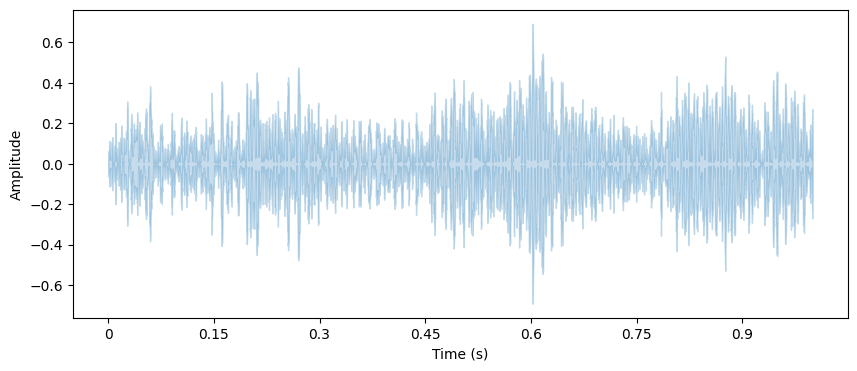

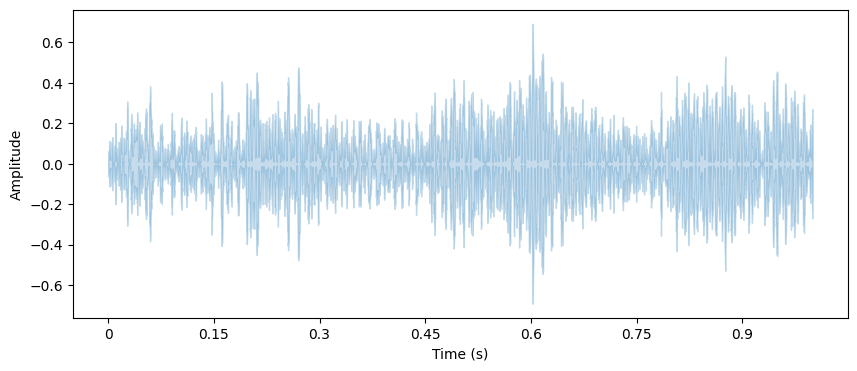

In [6]:
from src.Visualization.visualization import AudioVisualizer
visualization = AudioVisualizer(df)
visualization.CreateWavePlot("Audio")

##### Spectrogram
Description: This plot displays the frequency content of the audio signal over time.

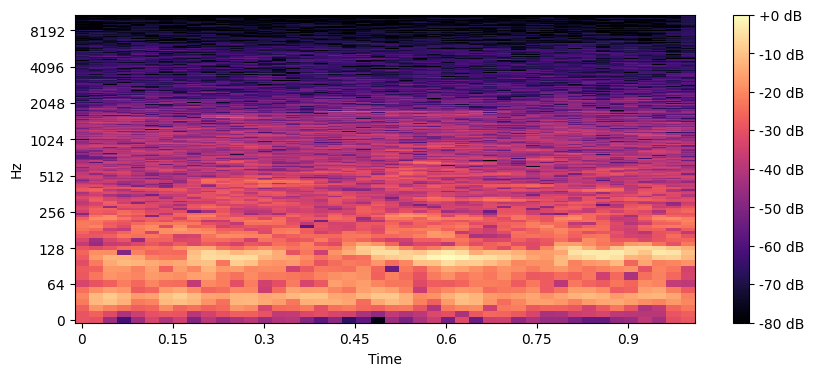

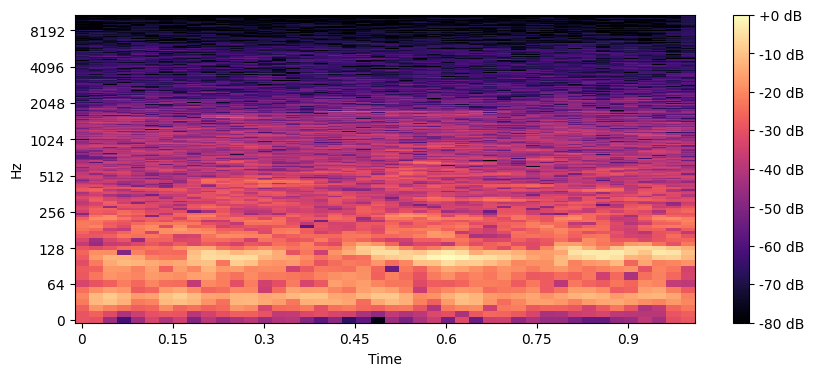

In [7]:
visualization.CreateSpectogram("Audio", "sample_rate")

##### Mel-Frequency Cepstral Coefficients (MFCCs)
Description: This plot illustrates the MFCC features extracted from the audio signal.

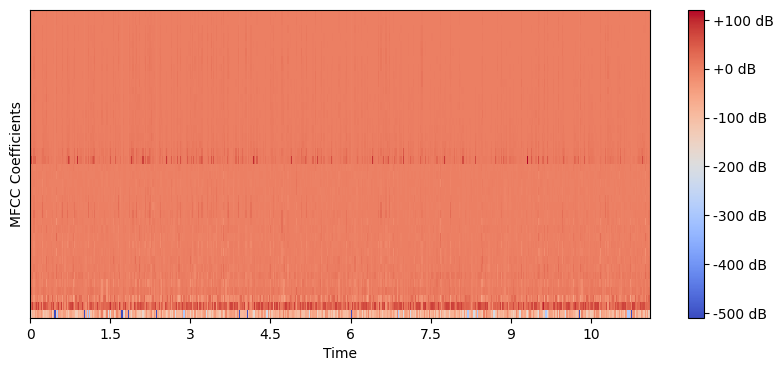

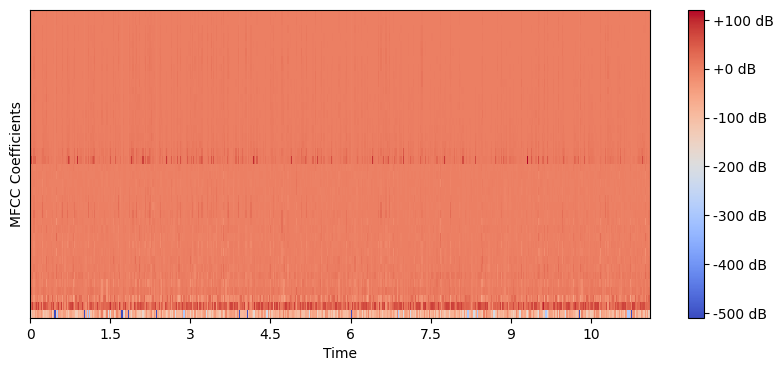

In [8]:
visualization.CreateMFCCplot("features")

### Power Spectrum

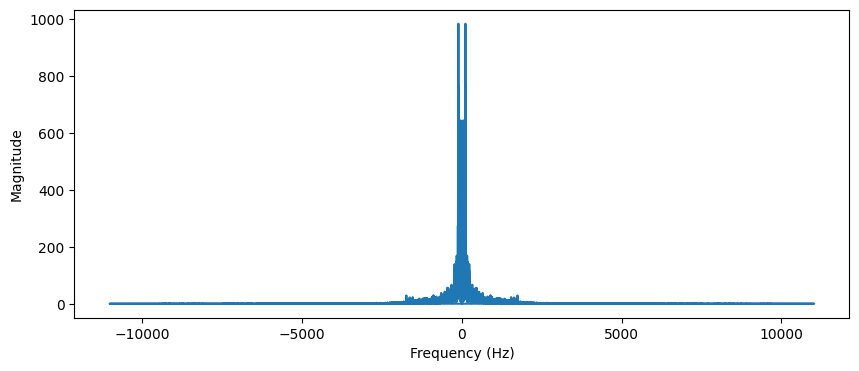

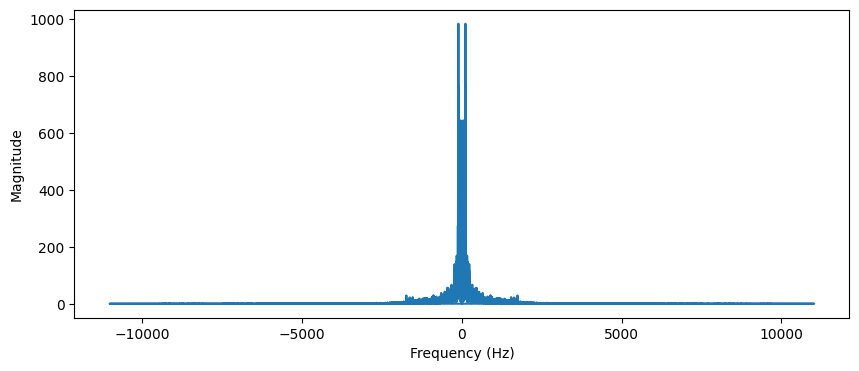

In [9]:
visualization.CreatePowerSpectrumPlot("Audio", "sample_rate")